In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from pathlib import Path

In [19]:
root_path = "/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_t2s_GAN_3slices_cmbTrainOnly"
task = "train"

### Dataset Visualization

In [20]:
img_num = "106"
slice_num = "013"

### Fixed Size Ground Truth Box

Text(0.5, 1.0, 'n+1 slice')

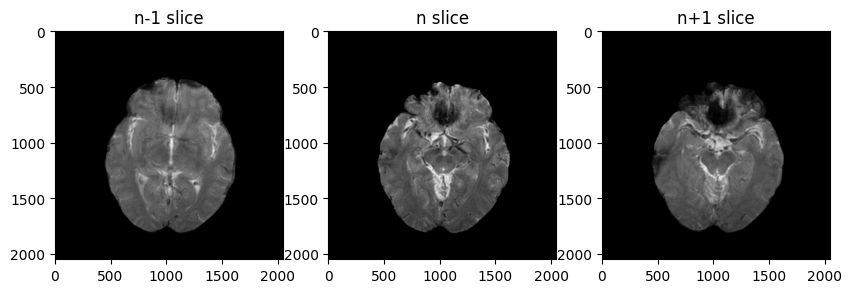

In [23]:
img_path = os.path.join(root_path, "images", task, f"sub-{img_num}_slice_{slice_num}.png")
img = Image.open(img_path)
img = np.array(img)

plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(img[:,:, 0], cmap='gray')
plt.title('n-1 slice')

plt.subplot(1,3,2)
plt.imshow(img[:,:, 1], cmap='gray')
plt.title('n slice')

plt.subplot(1,3,3)
plt.imshow(img[:,:, 2], cmap='gray')
plt.title('n+1 slice')


# def extract_patch(channel, center_x, center_y, patch_size):
#     """
#     Extract a fixed-size patch centered on the given coordinates
#     """
#     height, width = channel.shape
#     half_size = patch_size // 2
    
#     # Calculate patch boundaries
#     x_min = int(center_x - half_size)
#     y_min = int(center_y - half_size)
#     x_max = int(center_x + half_size)
#     y_max = int(center_y + half_size)
    
#     # Handle edge cases
#     if x_min < 0:
#         x_max -= x_min  # Shift patch right
#         x_min = 0
#     if y_min < 0:
#         y_max -= y_min  # Shift patch down
#         y_min = 0
#     if x_max > width:
#         x_min -= (x_max - width)  # Shift patch left
#         x_max = width
#     if y_max > height:
#         y_min -= (y_max - height)  # Shift patch up
#         y_max = height
    
#     return channel[y_min:y_max, x_min:x_max]

# def plot_yolo_boxes_with_channel_patches(image_path, bboxes):
#     """
#     Plot original channels and their 16x16 patches without overlap
#     """
#     if not os.path.exists(image_path):
#         raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
#     try:
#         image = Image.open(image_path)
#         image = np.array(image)
#     except Exception as e:
#         raise IOError(f"Error reading the image: {e}")
    
#     if len(image.shape) == 2:
#         image = np.stack((image,) * 3, axis=-1)
#     height, width = image.shape[:2]
#     n_boxes = len(bboxes)
    
#     if n_boxes == 0:
#         print("No bounding boxes found in the image.")
#         return
        
#     # Create figure with original image row plus one row per bbox
#     fig = plt.figure(figsize=(15, 4 * (n_boxes + 1)))

#     # Create GridSpec with n_boxes + 1 rows (1 for original images, rest for patches)
#     gs = plt.GridSpec(n_boxes + 1, 3, figure=fig, hspace=0.4)

#     # Channel names
#     channel_names = ['T1', 'T2', 'T2S']

#     # Plot each channel
#     for channel_idx, channel_name in enumerate(channel_names):
#         # Extract channel
#         channel = image[:, :, channel_idx]

#         # Plot full image in top row
#         ax = fig.add_subplot(gs[0, channel_idx])
#         # im = ax.imshow(channel, cmap='gray', vmin=0, vmax=255)
#         im = ax.imshow(channel, cmap='gray')
#         ax.set_title(f'{channel_name}')
#         plt.colorbar(im, ax=ax, label='Intensity')
        
#         # Draw all bounding boxes on original image
#         for bbox in bboxes:
#             class_id, x_center, y_center, gt_width, gt_height = bbox
#             center_x = int(x_center * width)
#             center_y = int(y_center * height)
            
#             patch_size = gt_width * width
            
#             # Draw fixed-size box
#             half_size = patch_size // 2
#             x_min = center_x - half_size
#             y_min = center_y - half_size
            
#             if class_id == 0:
#                 # Draw box for class 0
#                 rect = plt.Rectangle((x_min, y_min), patch_size, patch_size,
#                                      linewidth=0.3, edgecolor='blue', facecolor='none')
#             elif class_id == 1:
#                 rect = plt.Rectangle((x_min, y_min), patch_size, patch_size,
#                                 linewidth=0.3, edgecolor='red', facecolor='none')
#             ax.add_patch(rect)
        
#         # Plot patches
#         for box_idx, bbox in enumerate(bboxes):
#             _, x_center, y_center, gt_width, gt_height = bbox
#             center_x = int(x_center * width)
#             center_y = int(y_center * height)
            
#             # Extract patch
#             patch_size = gt_width * width
#             patch = extract_patch(channel, center_x, center_y, patch_size)
#             # Create subplot for patch in its own row
#             ax_patch = fig.add_subplot(gs[box_idx + 1, channel_idx])
#             # im_patch = ax_patch.imshow(patch, cmap='gray', vmin=0, vmax=255)
#             im_patch = ax_patch.imshow(patch, cmap='gray')
#             ax_patch.set_title(f'{channel_name} Patch {box_idx + 1}')
#             plt.colorbar(im_patch, ax=ax_patch, label='Intensity')
#             ax_patch.axis('on')
    
#     plt.suptitle('Ground Truth', fontsize=16, y=0.95)
#     plt.tight_layout()
#     plt.show()

# def visualize_image_channels_and_patches(root_path, img_num, slice_num):
#     """
#     Visualize MRI channels and their patches with fixed-size boxes
#     """
#     label_path = f"{root_path}/labels/{task}/sub-{img_num}_slice_{slice_num}.txt"
#     image_path = label_path.replace("labels", "images").replace("txt", "png")

#     plot_original_image(image_path)
    
#     try:
#         with open(label_path, 'r') as txt_file:
#             bboxes = [list(map(float, line.split())) for line in txt_file.readlines()]
        
#         plot_yolo_boxes_with_channel_patches(image_path, bboxes)
        
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         try:
#             with Image.open(image_path) as img:
#                 print(f"Image format: {img.format}")
#                 print(f"Image size: {img.size}")
#                 print(f"Image mode: {img.mode}")
#         except Exception as e:
#             print(f"Could not open the image for additional information: {e}")
            
# def plot_original_image(img_path):    
#     img = Image.open(img_path)
#     img = np.array(img)
    
#     print(img.shape)
#     plt.figure(figsize=(10, 10))

#     plt.subplot(1,3,1)
#     plt.imshow(img[:,:,0], cmap='gray')
#     plt.title('T1 Original Image')

#     plt.subplot(1,3,2)
#     plt.imshow(img[:,:,1], cmap='gray')
#     plt.title('T2 Original Image')

#     plt.subplot(1,3,3)
#     plt.imshow(img[:,:,2], cmap='gray')
#     plt.title('T2S Original Image')

(2048, 2048, 3)


/tmp/ipykernel_152373/1977219819.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


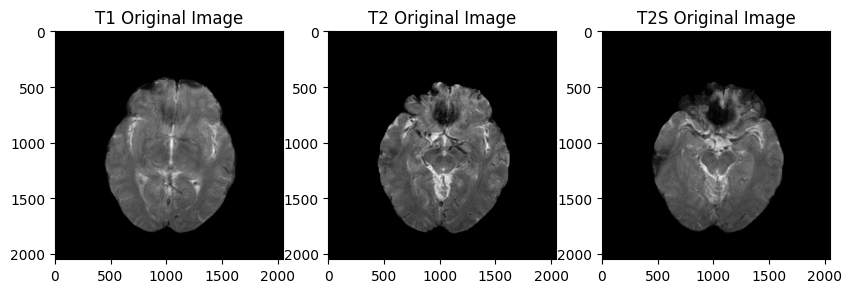

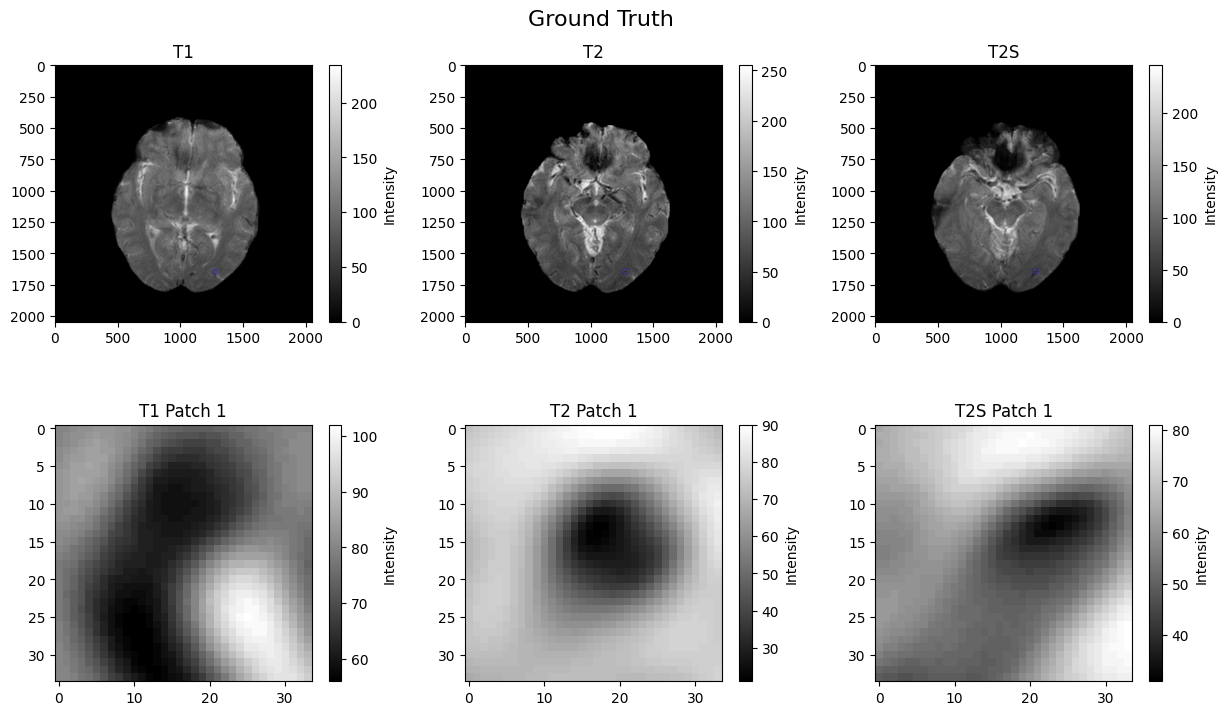

In [ ]:
visualize_image_channels_and_patches(root_path, img_num, slice_num)

In [ ]:
def find_nonempty_text_files(directory):
    nonempty_files = []
    dir_path = Path(directory)
    for txt_file in dir_path.glob("*.txt"):
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)  
    return sorted(nonempty_files)  # Sort alphabetically

# task = "val"
directory = f"{root_path}/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

count = 0
print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    count += 1
    print(f"- {filename}")
print(count)

Found 324 non-empty text files:
- sub-101_slice_008.txt
- sub-101_slice_009.txt
- sub-101_slice_011.txt
- sub-101_slice_012.txt
- sub-101_slice_015.txt
- sub-101_slice_016.txt
- sub-101_slice_017.txt
- sub-101_slice_027.txt
- sub-102_slice_017.txt
- sub-106_slice_011.txt
- sub-106_slice_013.txt
- sub-106_slice_014.txt
- sub-107_slice_013.txt
- sub-107_slice_023.txt
- sub-108_slice_015.txt
- sub-108_slice_016.txt
- sub-108_slice_017.txt
- sub-108_slice_025.txt
- sub-207_slice_041.txt
- sub-207_slice_042.txt
- sub-207_slice_043.txt
- sub-207_slice_044.txt
- sub-207_slice_061.txt
- sub-207_slice_062.txt
- sub-207_slice_063.txt
- sub-207_slice_064.txt
- sub-207_slice_065.txt
- sub-207_slice_066.txt
- sub-207_slice_090.txt
- sub-207_slice_091.txt
- sub-207_slice_092.txt
- sub-207_slice_093.txt
- sub-207_slice_094.txt
- sub-207_slice_102.txt
- sub-207_slice_103.txt
- sub-207_slice_104.txt
- sub-207_slice_105.txt
- sub-207_slice_106.txt
- sub-207_slice_107.txt
- sub-207_slice_108.txt
- sub-20